In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

In [3]:
serie = [10.5,11.2,12,13.5,15.2,14.8,14.6,15.3,16,17.2,16.5,18,10.8,11.4,12.2,13.7,15.6,15,14.9,15.8,16.3,17.4,16.8,18.5,11.2,12,12.8,14.2,16,15.4,15.2,16.1,17,17.8,17.1,19,11.5,12.3,13.2]
serie = np.array(serie)

In [4]:
#Exercicio 1
media = round(serie.mean(),2)

subgrupo = 12
medianas = [np.median(serie[i:i + subgrupo]) for i in range(0, len(serie), subgrupo)]

desvioPadrao = serie.std()

variancia = np.var(serie)
desvio_padrao = np.std(serie)

venda_min = serie.min()
venda_max = serie.max()

In [5]:
#Exercicio 2
quartis = np.percentile(serie, [25, 50, 75])

q1 = quartis[0]  #Primeiro quartil (25%)
q2 = quartis[1]  #Segundo quartil (mediana - 50%)
q3 = quartis[2]  #Terceiro quartil (75%)
iqr = q3 - q1

serie_media = np.zeros(len(serie))
serie_media[:] = serie.mean()

serie_limite_superior = np.zeros(len(serie))
serie_limite_superior[:] = serie.mean() + serie.std()

serie_limite_inferior = np.zeros(len(serie))
serie_limite_inferior[:] = serie.mean() - serie.std()

print(f'A média de vendas durante os anos 2024 à 2027 é de {media} (em unidades monetárias).')

print(f'A mediana do ano de 2024 é de {medianas[0]}.')
print(f'A mediana do ano de 2025 é de {medianas[1]}.')
print(f'A mediana do ano de 2026 é de {medianas[2]}.')
print(f'A mediana do ano de 2027 é de {medianas[3]}.')

print(f'Variância: {variancia}')
print(f'Desvio Padrão: {desvio_padrao}')

print(f'O mês com a menor venda foi Jan/2024 e o valor de venda foi: {venda_min}')
print(f'O mês com a maior venda foi Dez/2026 e o valor de venda foi:: {venda_max}')

print("Primeiro Quartil (Q1):", q1)
print("Segundo Quartil (Mediana - Q2):", q2)
print("Terceiro Quartil (Q3):", q3)
print("Intervalo Interquartil (IQR):", iqr)

A média de vendas durante os anos 2024 à 2027 é de 14.72 (em unidades monetárias).
A mediana do ano de 2024 é de 15.0.
A mediana do ano de 2025 é de 15.3.
A mediana do ano de 2026 é de 15.7.
A mediana do ano de 2027 é de 12.3.
Variância: 5.40249835634451
Desvio Padrão: 2.3243275062573496
O mês com a menor venda foi Jan/2024 e o valor de venda foi: 10.5
O mês com a maior venda foi Dez/2026 e o valor de venda foi:: 19.0
Primeiro Quartil (Q1): 12.55
Segundo Quartil (Mediana - Q2): 15.2
Terceiro Quartil (Q3): 16.4
Intervalo Interquartil (IQR): 3.849999999999998


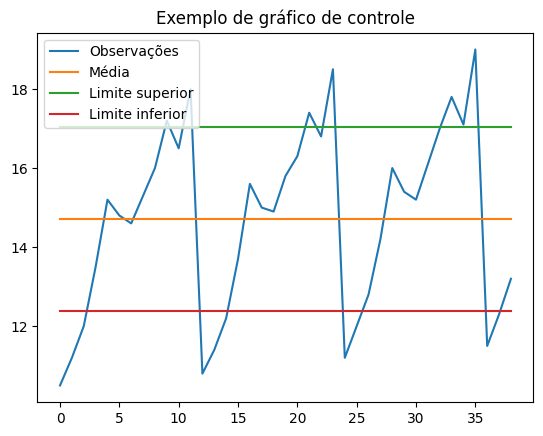

In [6]:
#Gráfico
sns.lineplot(data=serie, label='Observações')
sns.lineplot(data=serie_media, label='Média')
sns.lineplot(data=serie_limite_superior, label='Limite superior')
sns.lineplot(data=serie_limite_inferior, label='Limite inferior')
plt.title("Exemplo de gráfico de controle")
plt.legend()
plt.show()

In [7]:
#Forecasting
meses = np.arange(1, len(serie) + 10).reshape(-1, 1)
modelo = LinearRegression()
modelo.fit(meses[:len(serie)], serie)
previsao_2028 = modelo.predict(meses[len(serie):])

print("Previsão de Vendas de abrir de 2027 até 2028:")

for i, valor in enumerate(previsao_2028):
    print(f"Previsão para o mês {i + 1}: {round(valor,2)}")

print(" ")

erro_medio = np.mean(previsao_2028 - media)
print(f'O Erro médio da analise de tendencia é: {round(erro_medio,2)}')

erro_percentual_medio = np.mean((previsao_2028 - media) / media) * 100
print(f'O Erro médio da analise de tendencia é: {round(erro_percentual_medio,2)} %')
print(" ")

Previsão de Vendas de abrir de 2027 até 2028:
Previsão para o mês 1: 15.7
Previsão para o mês 2: 15.75
Previsão para o mês 3: 15.79
Previsão para o mês 4: 15.84
Previsão para o mês 5: 15.89
Previsão para o mês 6: 15.94
Previsão para o mês 7: 15.99
Previsão para o mês 8: 16.04
Previsão para o mês 9: 16.09
 
O Erro médio da analise de tendencia é: 1.17
O Erro médio da analise de tendencia é: 7.97 %
 


In [8]:
#Previsao para 2023
meses = np.arange(1, len(previsao_2028) + 61).reshape(-1, 1)
modelo = LinearRegression()
modelo.fit(meses[:len(previsao_2028)], previsao_2028)
previsao_2032 = modelo.predict(meses[len(previsao_2028):])

print("Previsão de Vendas de abril de 2028 até 2032:")
for i, valor in enumerate(previsao_2032):
    print(f"Previsão para o mês {i + 1}: {round(valor,2)}")

print(" ")

Previsão de Vendas de abrir de 2028 até 2032:
Previsão para o mês 1: 16.14
Previsão para o mês 2: 16.19
Previsão para o mês 3: 16.24
Previsão para o mês 4: 16.28
Previsão para o mês 5: 16.33
Previsão para o mês 6: 16.38
Previsão para o mês 7: 16.43
Previsão para o mês 8: 16.48
Previsão para o mês 9: 16.53
Previsão para o mês 10: 16.58
Previsão para o mês 11: 16.63
Previsão para o mês 12: 16.68
Previsão para o mês 13: 16.72
Previsão para o mês 14: 16.77
Previsão para o mês 15: 16.82
Previsão para o mês 16: 16.87
Previsão para o mês 17: 16.92
Previsão para o mês 18: 16.97
Previsão para o mês 19: 17.02
Previsão para o mês 20: 17.07
Previsão para o mês 21: 17.12
Previsão para o mês 22: 17.17
Previsão para o mês 23: 17.21
Previsão para o mês 24: 17.26
Previsão para o mês 25: 17.31
Previsão para o mês 26: 17.36
Previsão para o mês 27: 17.41
Previsão para o mês 28: 17.46
Previsão para o mês 29: 17.51
Previsão para o mês 30: 17.56
Previsão para o mês 31: 17.61
Previsão para o mês 32: 17.65
Pre